# Proyek Analisis Data: bike-sharing
- **Nama:** Fikry Zaky Nazira Arya
- **Email:** rojopati1289@gmail.com,
             m010d4ky2313@bangkit.academy
- **ID Dicoding:** fikrigoodfather

## Menentukan Pertanyaan Bisnis

- Pada musim apa jumlah penyewaan sepeda tertinggi?
- Bagaimana pola penyewaan sepeda di tiap bulan dan tahun?
- Bagaimana pola penyewaan sepeda di hari-hari tertentu?

## Menyiapkan Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

## Data Wrangling

### Gathering Data

In [2]:
#load data harian
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
#load data tiap jam
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Menilai day_df

In [4]:
#melihat informasi setiap kolom day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
#cek missing values day_df
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
#melihat jumlah duplikasi data day_df
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
#melihat deskripsi kolom day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai hour_df

In [8]:
#melihat informasi kolom hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
#cek missing values hour_df
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
#melihat jumlah duplikasi data hour_df
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [11]:
#melihat deskripsi kolom hour_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### 3. Cleaning Data

#### Memperbaiki tipe data

In [12]:
#mengubah tipe data pada kolom "dteday" menjadi datetime
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

In [13]:
#melihat hasil perbaikan tipe data pada day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [14]:
#melihat hasil perbaikan tipe data pada hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

#### Memperbaiki nama kolom

In [15]:
#mengubah nama kolom 'dteday', 'yr', 'mnth', 'hr', 'temp', 'hum', 'cnt' menjadi lebih deskriptif
def rename_columns(dataframe, column_mapping):
    for old_col, new_col in column_mapping.items():
        dataframe.rename(columns={old_col: new_col}, inplace=True)

column_day = {'dteday': 'date', 'yr': 'year', 'mnth': 'month', 'temp': 'temperature', 'hum': 'humidity', 'cnt': 'total'}
column_hour = {'dteday': 'date', 'yr': 'year', 'mnth': 'month', 'hr': 'hour', 'temp': 'temperature', 'hum': 'humidity', 'cnt': 'total'}

rename_columns(day_df, column_day)
rename_columns(hour_df, column_hour)

#### Memperbaiki nama kategori season

In [16]:
season_mapping = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
day_df['season'] = day_df['season'].replace(season_mapping)
hour_df['season'] = hour_df['season'].replace(season_mapping)

#### Memperbaiki nama kategori month

In [17]:
day_df['month'] = day_df['month'].apply(lambda x: calendar.month_name[x])
hour_df['month'] = hour_df['month'].apply(lambda x: calendar.month_name[x])

#### Memperbaiki nama kategori year

In [18]:
year_mapping = {0: '2011', 1: '2012'}
day_df['year'] = day_df['year'].replace(year_mapping)
hour_df['year'] = hour_df['year'].replace(year_mapping)

#### Memperbaiki nama kategori weekday

In [19]:
weekday_mapping = {0: 'sunday', 1: 'monday', 2: 'tuesday', 3: 'wednesday', 4: 'thursday', 5: 'friday', 6: 'saturday'}
day_df['weekday'] = day_df['weekday'].replace(weekday_mapping)
hour_df['weekday'] = hour_df['weekday'].replace(weekday_mapping)

In [20]:
#melihat sekilas data teratas day_df yang telah dimodifikasi
day_df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual,registered,total
0,1,2011-01-01,spring,2011,January,0,saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,2011,January,0,sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,2011,January,0,monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,2011,January,0,tuesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,2011,January,0,wednesday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [21]:
#melihat sekilas data teratas hour_df yang telah dimodifikasi
hour_df.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual,registered,total
0,1,2011-01-01,spring,2011,January,0,0,saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,spring,2011,January,1,0,saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,spring,2011,January,2,0,saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,spring,2011,January,3,0,saturday,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,spring,2011,January,4,0,saturday,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

#### Statistik penggunaan sepeda berdasarkan musim

In [22]:
day_df.groupby(by="season").agg({
    "casual": ["max", "min", "mean", "sum"],
    "registered": ["max", "min", "mean", "sum"],
    "total": ["max", "min", "mean", "sum"]
})

casual                           registered                            \
          max  min         mean     sum        max  min         mean     sum   
season                                                                         
fall     3160  118  1202.611702  226091       6917  889  4441.691489  835038   
spring   3155    9   334.928177   60622       5315  416  2269.204420  410726   
summer   3410  120  1106.097826  203522       6456  674  3886.233696  715067   
winter   3031    2   729.112360  129782       6946   20  3999.050562  711831   

       total                              
         max   min         mean      sum  
season                                    
fall    8714  1115  5644.303191  1061129  
spring  7836   431  2604.132597   471348  
summer  8362   795  4992.331522   918589  
winter  8555    22  4728.162921   841613

#### Statistik penggunaan sepeda berdasarkan bulan dan tahun

In [23]:
month_order = {month: i for i, month in enumerate(calendar.month_name[1:], start=1)}
day_df['month'] = pd.Categorical(day_df['month'], categories=sorted(month_order, key=month_order.get))

day_df.groupby(by=["year", "month"], observed=False).agg({
    "casual": ["max", "min", "mean", "sum"],
    "registered": ["max", "min", "mean", "sum"],
    "total": ["max", "min", "mean", "sum"]
})

casual                          registered                     \
                  max  min         mean    sum        max   min         mean   
year month                                                                     
2011 January      331    9    99.129032   3073       1844   416  1132.774194   
     February     694   47   222.928571   6242       2348   905  1499.035714   
     March       1424   46   413.741935  12826       2355   491  1652.225806   
     April       1965  121   744.866667  22346       3722   674  2417.466667   
     May         2355  255  1001.612903  31050       4238  2213  3379.709677   
     June        1920  513  1020.400000  30612       4488  2993  3763.333333   
     July        3065  562  1175.870968  36452       4220  2298  3383.516129   
     August      1914  226   930.387097  28842       4614   889  3479.000000   
     September   2521  118   884.833333  26545       4372  1689  3362.433333   
     October     2397   57   813.612903  25222       4267   570  3170.612903   
     November    1275   69   519.800000  15594       3891   935  2885.766667   
     December     706   50   272.516129   8448       3672   451  2544.354839   
2012 January     1070   67   289.322581   8969       4185  1234  2831.451613   
     February    1435   65   300.724138   8721       4546  1456  3255.724138   
     March       3155  203  1019.935484  31618       5893  2339  4298.612903   
     April       3252  120  1281.866667  38456       5950   907  4525.600000   
     May         3410  342  1426.935484  44235       6433  2501  4891.290323   
     June        2963  477  1443.133333  43294       6456  3594  5317.866667   
     July        2562  747  1345.322581  41705       6790  3195  5222.645161   
     August      2827  935  1393.451613  43197       6541  3341  5526.000000   
     September   3160  371  1459.266667  43778       6946  3197  5826.500000   
     October     3031    2  1114.129032  34538       6911    20  5300.096774   
     November    2290  123   700.300000  21009       5520  1470  4388.500000   
     December    1153    9   427.258065  13245       6055   432  3563.483871   

                       total                             
                   sum   max   min         mean     sum  
year month                                               
2011 January     35116  1985   431  1231.903226   38189  
     February    41973  2927  1005  1721.964286   48215  
     March       51219  3239   605  2065.967742   64045  
     April       72524  5312   795  3162.333333   94870  
     May        104771  5805  2633  4381.322581  135821  
     June       112900  5515  3767  4783.733333  143512  
     July       104889  6043  3285  4559.387097  141341  
     August     107849  5895  1115  4409.387097  136691  
     September  100873  5423  1842  4247.266667  127418  
     October     98289  5511   627  3984.225806  123511  
     November    86573  4486  1495  3405.566667  102167  
     December    78875  3940   705  2816.870968   87323  
2012 January     87775  4521  1301  3120.774194   96744  
     February    94416  5062  1529  3556.448276  103137  
     March      133257  8362  3194  5318.548387  164875  
     April      135768  7460  1027  5807.466667  174224  
     May        151630  8294  2843  6318.225806  195865  
     June       159536  8120  4127  6761.000000  202830  
     July       161902  8173  4459  6567.967742  203607  
     August     171306  7865  4549  6919.451613  214503  
     September  174795  8714  4073  7285.766667  218573  
     October    164303  8156    22  6414.225806  198841  
     November   131655  6852  2277  5088.800000  152664  
     December   110468  6606   441  3990.741935  123713

#### Jumlah penggunaan sepeda di tiap hari di hari libur

In [24]:
hour_df[(hour_df["holiday"] == 1) | (hour_df["workingday"] == 0)].groupby(by=["weekday"], observed=False).agg({"total": ["sum"]})

,total
,sum
weekday,
friday,6494
monday,59605
saturday,477807
sunday,444027
thursday,3920
tuesday,1013
wednesday,7403


#### Jumlah penggunaan sepeda di tiap hari di hari kerja

In [25]:
hour_df[(hour_df["holiday"] == 0) & (hour_df["workingday"] == 1)].groupby(by=["weekday"], observed=False).agg({"total": ["sum"]})

,total
,sum
weekday,
friday,481296
monday,395898
thursday,481475
tuesday,468096
wednesday,465645


## Data Visualization

### Pertanyaan 1: Pada musim apa jumlah penyewaan sepeda tertinggi?

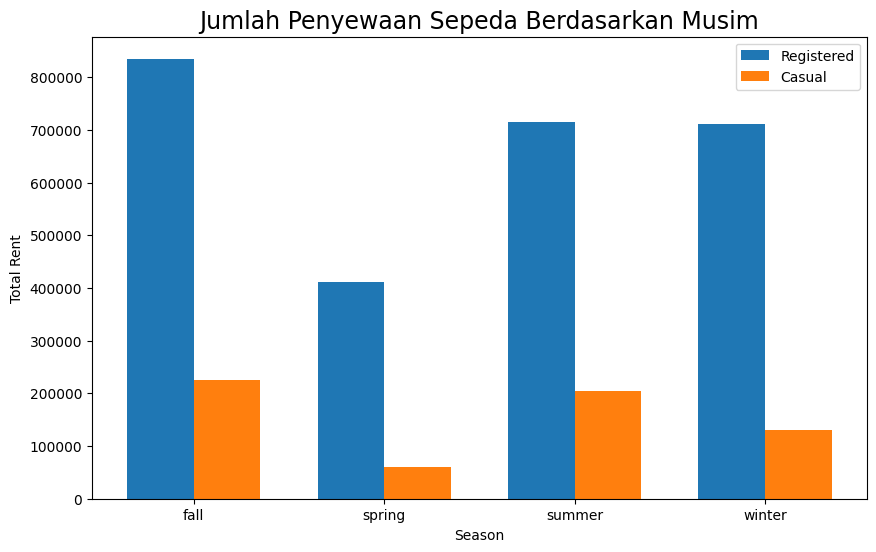

In [26]:
plot_season = day_df.groupby('season')[['registered', 'casual']].sum().reset_index()

plt.figure(figsize=(10, 6))

bar_width = 0.35
bar_positions1 = range(len(plot_season['season']))
bar_positions2 = [pos + bar_width for pos in bar_positions1]

plt.bar(bar_positions1, plot_season['registered'], width=bar_width, label='Registered', color='tab:blue')
plt.bar(bar_positions2, plot_season['casual'], width=bar_width, label='Casual', color='tab:orange')

plt.xlabel('Season')
plt.ylabel('Total Rent')
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Musim', fontsize = 17)
plt.xticks([pos + bar_width/2 for pos in bar_positions1], plot_season['season'])
plt.legend()
plt.show()

### Pertanyaan 2: Bagaimana pola penyewaan sepeda di tiap bulan dan tahun?

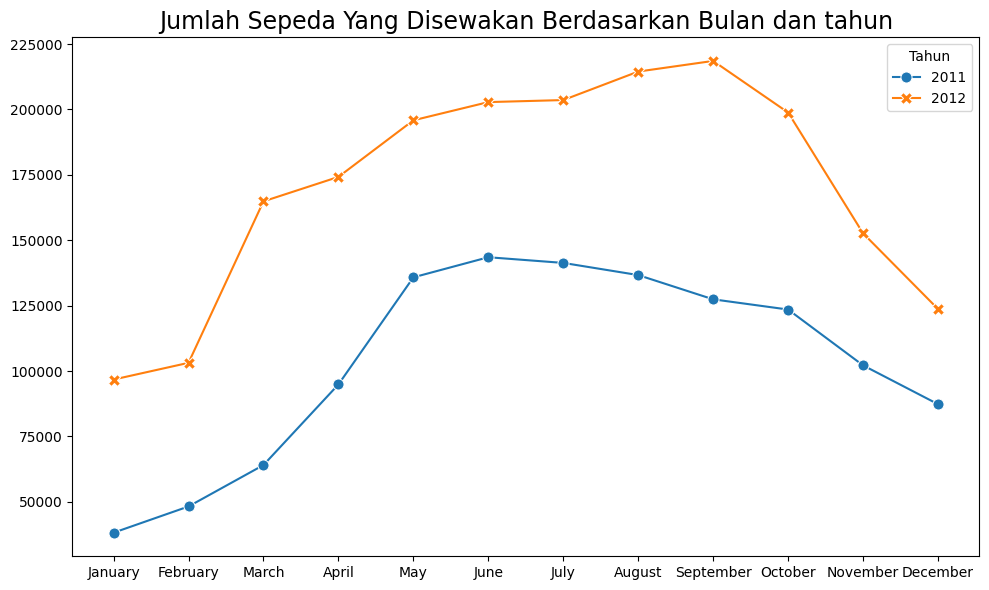

In [27]:
plt.figure(figsize=(10, 6))

plot_ym = day_df.groupby(by=["month", "year"], observed=False).agg({
    "total": "sum"
}).reset_index()

sns.lineplot(
    data=plot_ym,
    x="month",
    y="total",
    hue="year",
    style="year",  
    markers=True,
    markersize=8,  
    dashes=False,  
)

plt.grid(False)
plt.title("Jumlah Sepeda Yang Disewakan Berdasarkan Bulan dan tahun", fontsize = 17)
plt.xlabel(None)
plt.ylabel(None)
plt.legend(title="Tahun", loc="upper right")
plt.tight_layout()

plt.show()


### Pertanyaan 3: Bagaimana pola penyewaan sepeda di hari-hari tertentu?

<Figure size 3000x1000 with 0 Axes>

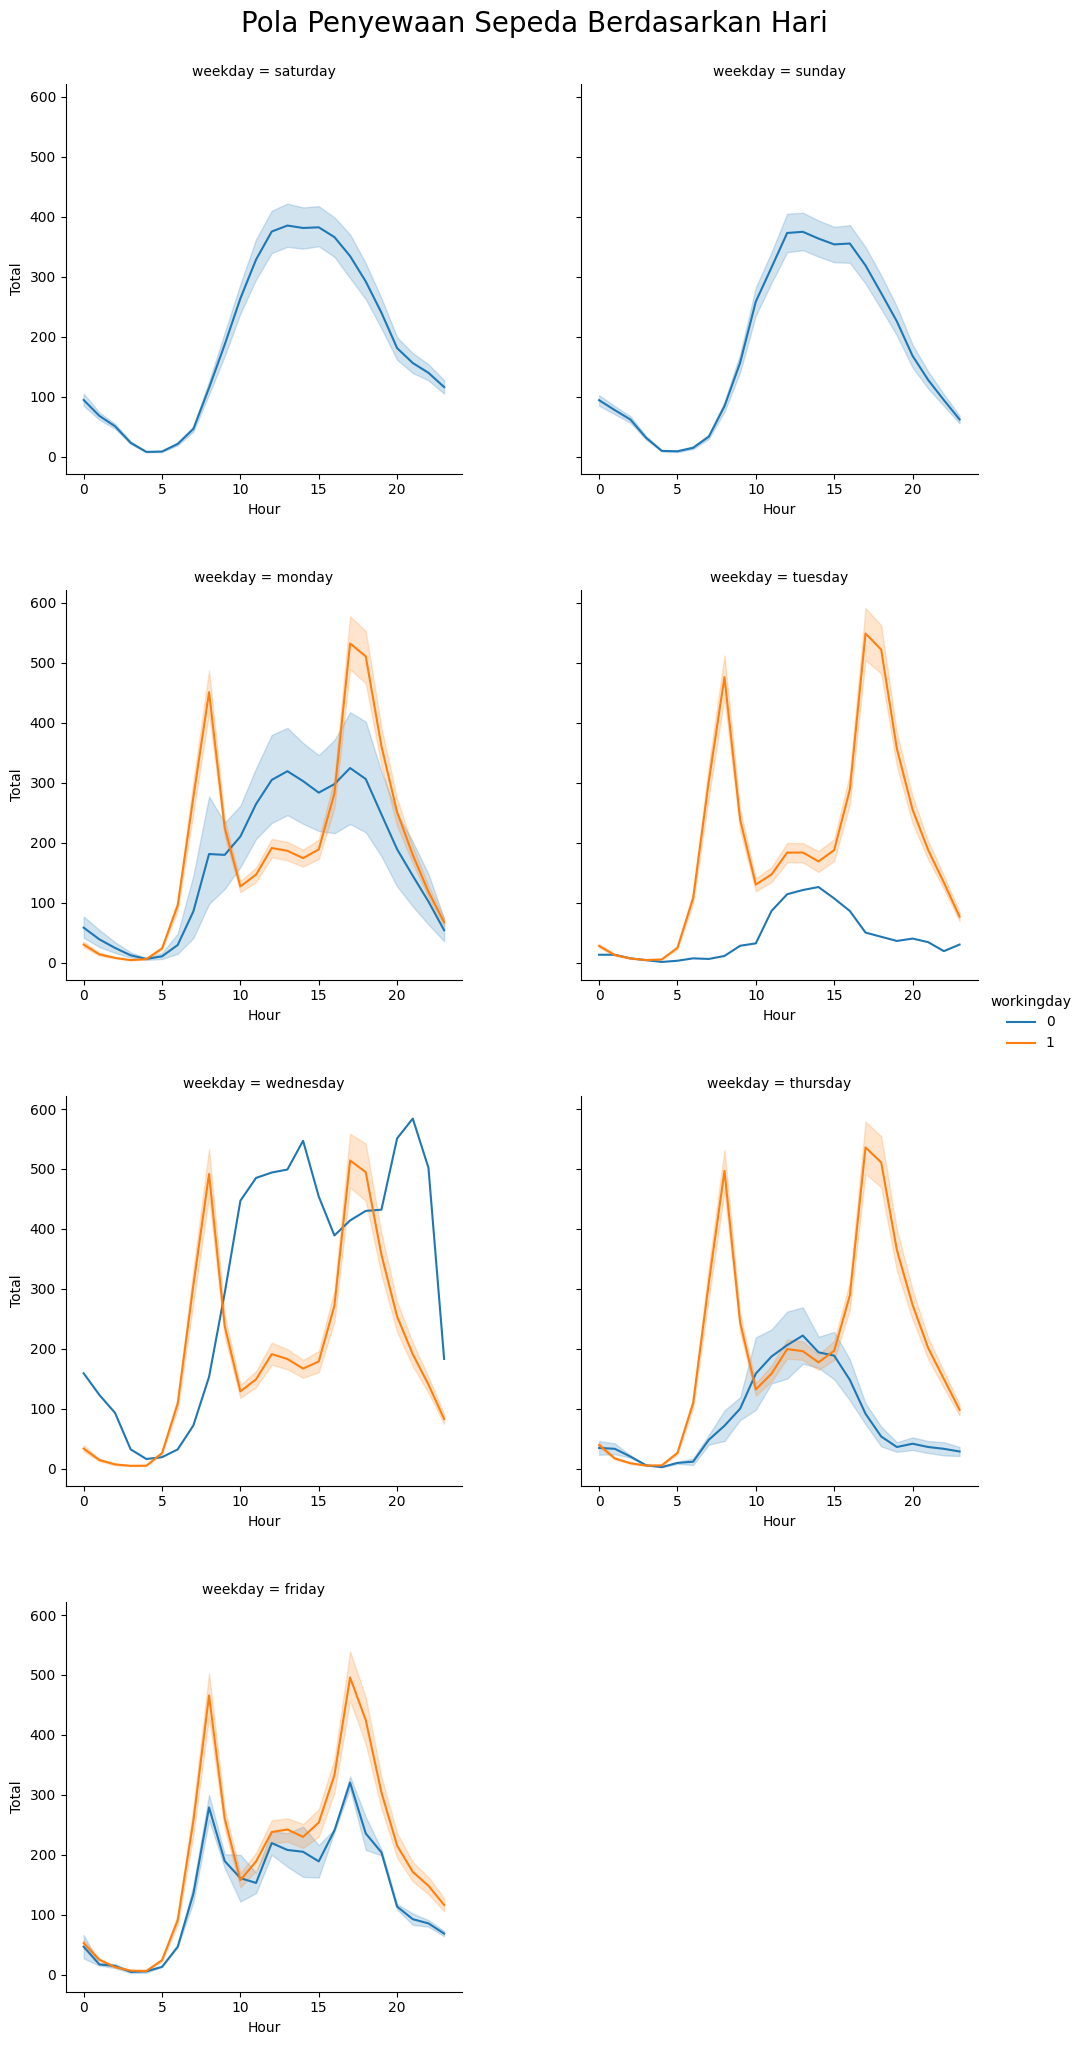

In [28]:
plt.figure(figsize=(30, 10))

mask1 = ((hour_df['workingday'] == 0) | (hour_df['holiday'] == 1))
df1 = hour_df[mask1]
mask2 = ((hour_df['workingday'] == 1) & (hour_df['holiday'] == 0))
df2 = hour_df[mask2]

plot_weekday = sns.FacetGrid(hour_df, col='weekday', hue='workingday', col_wrap=2, height=5, sharex=False)
plot_weekday.map(sns.lineplot, "hour", "total")
plot_weekday.fig.suptitle('Pola Penyewaan Sepeda Berdasarkan Hari', y=1.02, fontsize=20)
plot_weekday.set_axis_labels('Hour', 'Total')
plot_weekday.add_legend()

for ax in plot_weekday.axes.flat:
    ax.set(xlabel="Hour")
plot_weekday.set_titles(size=10)

plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

### Conclusion

#### Pertanyaan 1: Pada musim apa jumlah penyewaan sepeda tertinggi?
Musim gugur (fall) memiliki jumlah penyewaan sepeda tertinggi dibandingkan musim lain, yaitu di atas 1 juta, baik itu untuk casual maupun registered user. Sebaliknya, musim semi (spring) memiliki jumlah penyewaan sepeda terendah, yaitu hanya sebesar 471.348. Di sisi lain, untuk setiap musim, registered user mendominasi jumlah penyewaan sepeda.

#### Pertanyaan 2: Bagaimana pola penyewaan sepeda di tiap bulan dan tahun?
Jumlah penyewaan sepeda di tahun 2012 lebih tinggi untuk setiap bulan dibandingkan tahun 2011. Selain itu, pola penyewaan sepeda memiliki tren yang meningkat di awal tahun sampai kuartal 3, kemudian menurun sampai akhir tahun.

#### Pertanyaan 3: Bagaimana pola penyewaan sepeda di hari-hari tertentu?
Di hari kerja,  jumlah penyewaan sepeda tinggi pada jam tertentu seperti jam 5.00-8.00 dan jam 15.00-17.00. Hal ini mengindikasikan bahwa jam berangkat dan pulang kerja memiliki keterkaitan dengan tingginya jumlah penyewaan sepeda. Selain itu, di akhir pekan jumlah penyewaan sepeda cenderung meningkat pada jam 07.00-15.00. Sedangkan di hari libur yang jatuh pada weekday, jumlah penyewaan sepeda lebih fluktuatif.